In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/Housing Price INIT.csv')

df = pd.DataFrame(data)

print(df.shape)

(545, 13)


In [26]:
# Quick look at the data
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
17  8960000  8500         3          2        4         1          0   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  
15         1                0                0        2         0  
16         1                0                1        1         1  
17         0                0                1        2         0  
18         0                0                1        2         0  
19         0                0                1        1         1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 12 columns):
 #   Column           Non

In [16]:
# Remove outliers from price column
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Remove outliers from area column
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

outlier = []

# Check price outliers
for index, price in df['price'].items():
    if price >= (Q3_price + 1.5*IQR_price) or price <= (Q1_price - 1.5*IQR_price):
        outlier.append(index)

# Check area outliers
for index, area in df['area'].items():
    if area >= (Q3_area + 1.5*IQR_area) or area <= (Q1_area - 1.5*IQR_area):
        outlier.append(index)

# Remove duplicates from outlier list and drop them
outlier = list(set(outlier))
df.drop(outlier, axis=0, inplace=True)

print(df.shape)

(517, 13)


In [17]:
#Here, I decided to remove just the furnishingstatus column
df.drop(columns= ['furnishingstatus'], axis= 1, inplace= True)
print("Shape after removing unnecessary Column(s):", df.shape)

Shape after removing unnecessary Column(s): (517, 12)


In [18]:
#Let's first get all the columns that have strings instead of numbers

categorial_columns = []

for column in df:
    if df[column].dtype == object:
        categorial_columns.append(column)

le = LabelEncoder()

for col in categorial_columns:
    df[col] = le.fit_transform(df[col])

In [19]:
#Splitting the Data into Training (80%) Data and Testing Data (20%)

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [20]:
# List of columns to scale to ensure all features are on the same numerical range for model trainingto  prevent bias in the model due to different value ranges of features

scaler = MinMaxScaler()
scale_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[scale_columns] = scaler.fit_transform(df_train[scale_columns])
df_test[scale_columns] = scaler.transform(df_test[scale_columns])  # Changed this line!

In [21]:
# Trainig data

model = LinearRegression()

x_train = df_train.drop(columns= 'price')
y_train = df_train['price']

model.fit(x_train, y_train)

LinearRegression()

In [22]:
# Predicting data

x_test = df_test.drop(columns= 'price')
y_test = df_test['price']

y_prediction = model.predict(x_test)


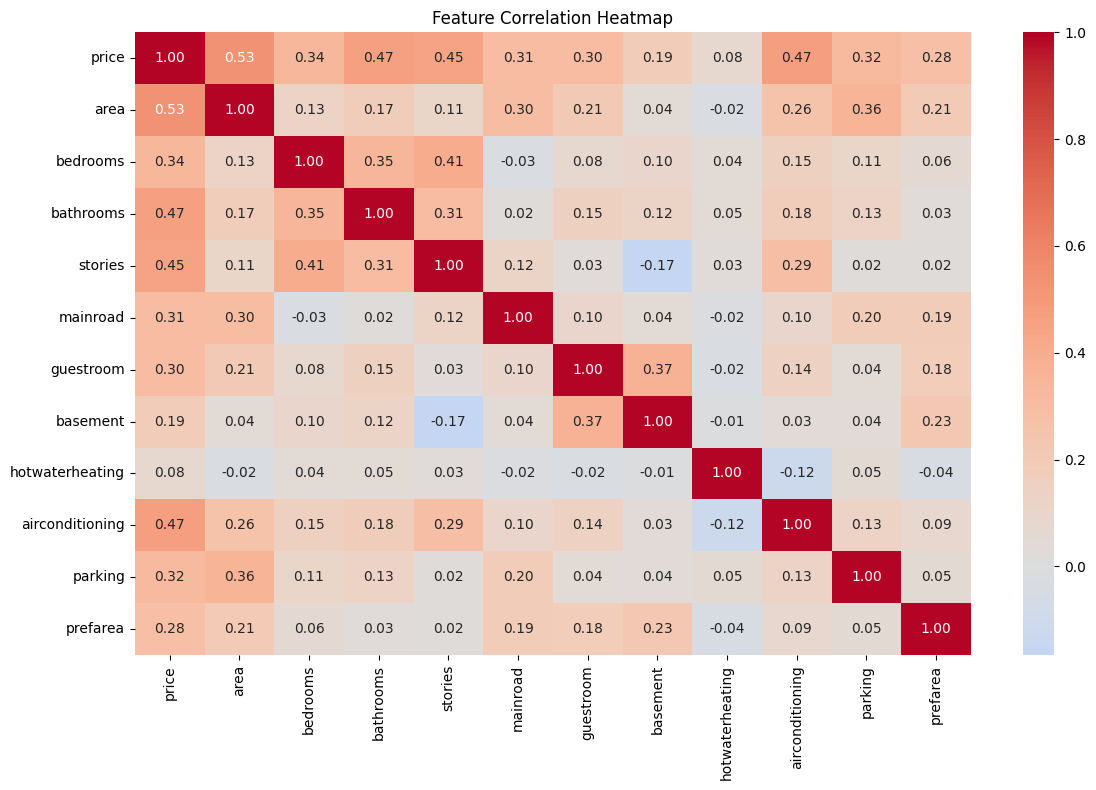

In [27]:
# Correlation heatmap to see relationships between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

r^2 Score = 0.6358565284355948
Mean Squared Error = 0.019222220816087928


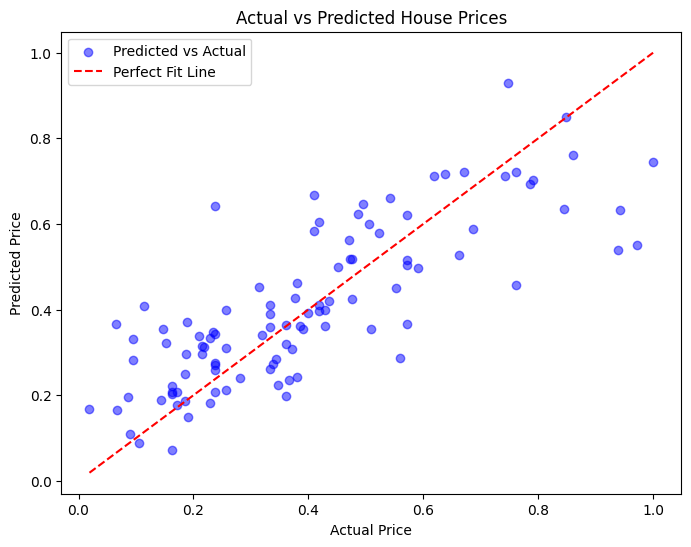

In [23]:
#5) RESULTS & EVALUATION OF OUR MODEL

r2 = r2_score(y_test, y_prediction)
print("r^2 Score =", r2)

mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error =", mse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_prediction, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

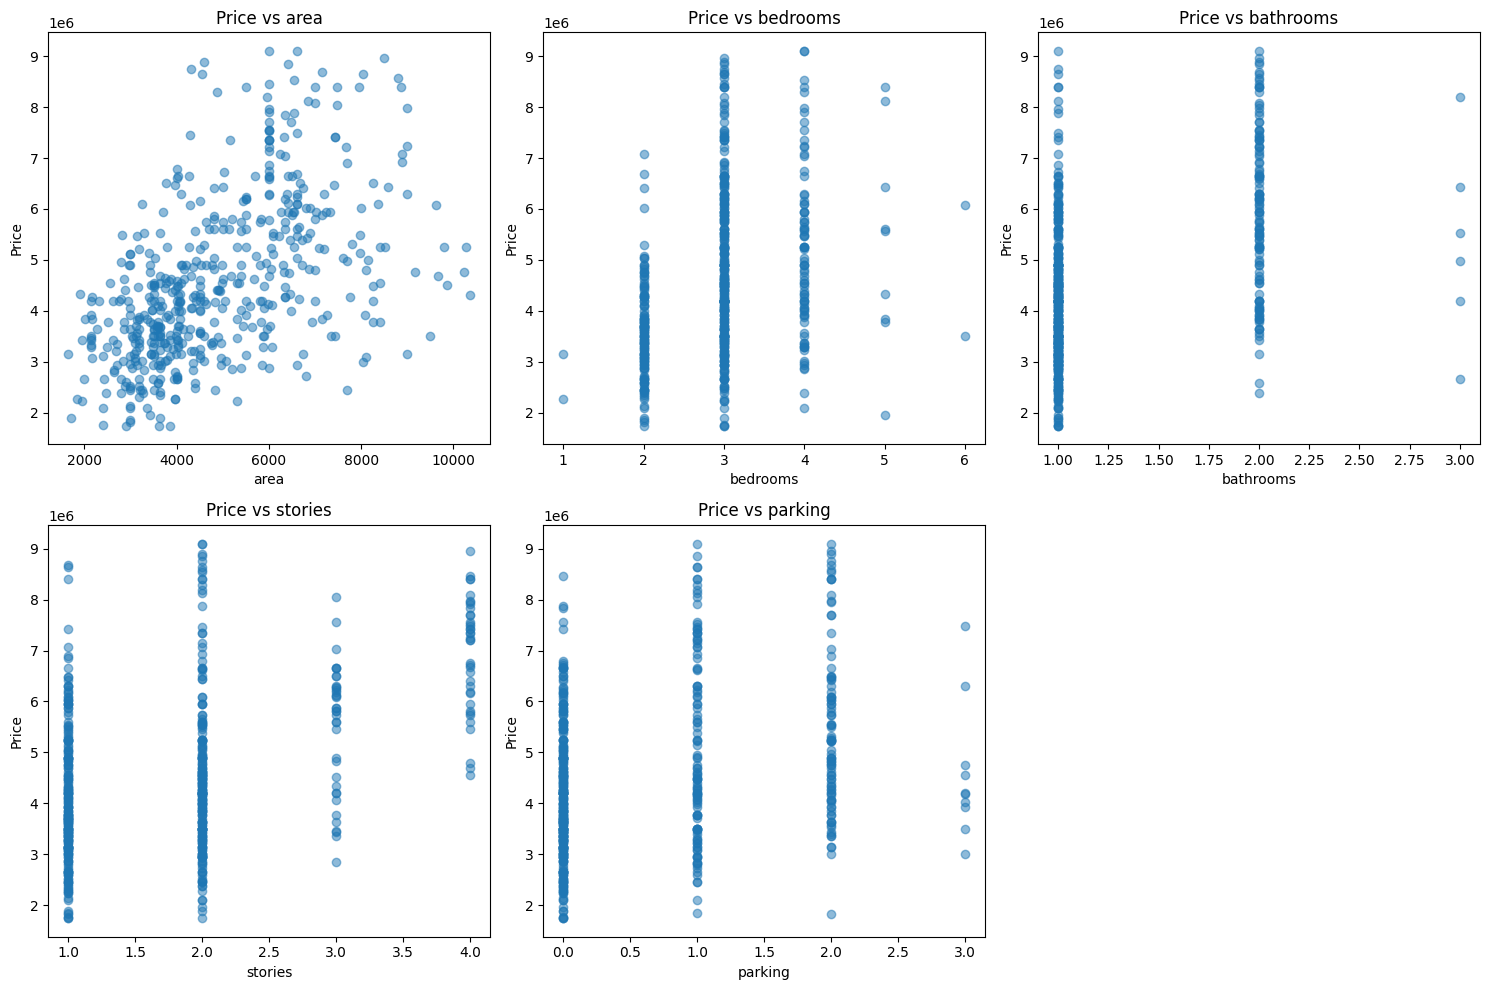

In [24]:

import matplotlib.pyplot as plt

# Define the features you want to analyze
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create scatter plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[feature], df['price'], alpha=0.5)
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


1-Area, 2-Bedroom, 3-Bathrooms, 4-Parking, 5-Stories

The most important factor(Feature) to the least, based on data given


Feature Importance (Coefficients):
            Feature  Coefficient
0              area     0.350128
2         bathrooms     0.208289
3           stories     0.198222
7   hotwaterheating     0.114768
8   airconditioning     0.094482
10         prefarea     0.086713
9           parking     0.077329
4          mainroad     0.057509
6          basement     0.045608
1          bedrooms     0.040576
5         guestroom     0.018813


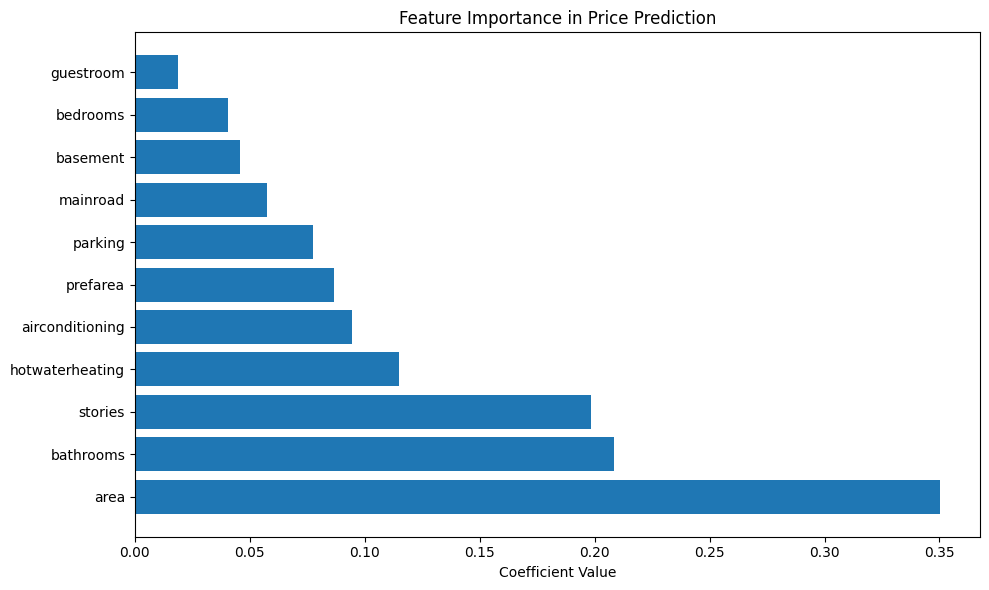

In [25]:
# Feature Importance - Which features matter most?
feature_names = x_train.columns
coefficients = model.coef_

# Create a dataframe to visualize
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
importance_df = importance_df.sort_values('Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(importance_df)

# Plot it
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Price Prediction')
plt.tight_layout()
plt.show()